In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**Load the data**

In [39]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
train0 = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test0 = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
train0
test0

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [40]:

train0=train0.apply(lambda row: row[train0['MSZoning'].isin(['RL', 'RM', 'FV', 'RH'])])
test0=test0.apply(lambda row: row[test0['MSZoning'].isin(['RL', 'RM', 'FV', 'RH'])])

train0['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'RH'], dtype=object)

In [7]:

test0['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'RH'], dtype=object)

In [8]:
#check data information
train0.info()
test0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1450 non-null   int64  
 1   MSSubClass     1450 non-null   int64  
 2   MSZoning       1450 non-null   object 
 3   LotFrontage    1191 non-null   float64
 4   LotArea        1450 non-null   int64  
 5   Street         1450 non-null   object 
 6   Alley          89 non-null     object 
 7   LotShape       1450 non-null   object 
 8   LandContour    1450 non-null   object 
 9   Utilities      1450 non-null   object 
 10  LotConfig      1450 non-null   object 
 11  LandSlope      1450 non-null   object 
 12  Neighborhood   1450 non-null   object 
 13  Condition1     1450 non-null   object 
 14  Condition2     1450 non-null   object 
 15  BldgType       1450 non-null   object 
 16  HouseStyle     1450 non-null   object 
 17  OverallQual    1450 non-null   int64  
 18  OverallC

# Initial EDA

**Combine Train and Test Sets**

In [9]:
# Print shape and display head of the housing data df
data1 = pd.concat([train0, test0], axis=0).reset_index(drop=True)
data1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [10]:
# View data types and number of non-null values for each field
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2900 non-null   int64  
 1   MSSubClass     2900 non-null   int64  
 2   MSZoning       2900 non-null   object 
 3   LotFrontage    2382 non-null   float64
 4   LotArea        2900 non-null   int64  
 5   Street         2900 non-null   object 
 6   Alley          178 non-null    object 
 7   LotShape       2900 non-null   object 
 8   LandContour    2900 non-null   object 
 9   Utilities      2900 non-null   object 
 10  LotConfig      2900 non-null   object 
 11  LandSlope      2900 non-null   object 
 12  Neighborhood   2900 non-null   object 
 13  Condition1     2900 non-null   object 
 14  Condition2     2900 non-null   object 
 15  BldgType       2900 non-null   object 
 16  HouseStyle     2900 non-null   object 
 17  OverallQual    2900 non-null   int64  
 18  OverallC

In [11]:
#check the decriptive statistics for target valueSalePrice
data2 = data1.copy()
data2['SalePrice'].describe()


count      2900.000000
mean     181654.942069
std       79162.828236
min       37900.000000
25%      130000.000000
50%      163945.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

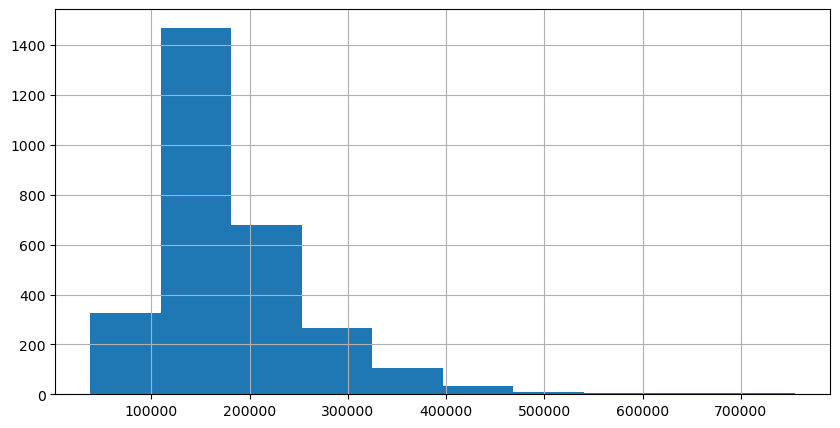

In [12]:
#check the distribution of target value

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
data2['SalePrice'].hist()

<Axes: title={'center': 'Boxplot of SalePrice'}>

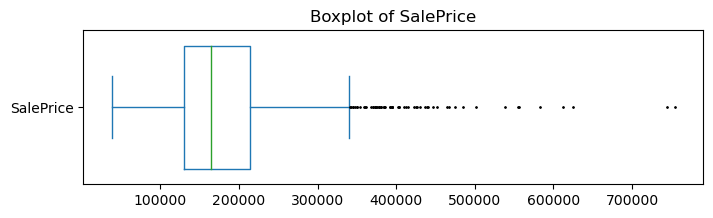

In [13]:

data2['SalePrice'].plot.box(figsize = (8,2), widths = 0.8, vert=False, 
flierprops = dict(markersize=0.7),title = 'Boxplot of SalePrice')


In [14]:
#combine the time (years + months) of property when sold,
data3= data2.copy()
data3['AgeSold'] = (data3.YrSold + (data3.MoSold-1)/12) 
data3.head()

#eliminate the column : YrSold, MoSold
data3 = data3.drop('MoSold',axis = 1)
data3 = data3.drop('YrSold',axis = 1)
data3.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [15]:
# show the all row of the data and
#check the missing value in the dataset

pd.set_option('display.max_rows', None)
data3.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       518
LotArea             0
Street              0
Alley            2722
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         16
MasVnrArea         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           74
BsmtCond           74
BsmtExposure       76
BsmtFinType1       74
BsmtFinSF1          0
BsmtFinType2       76
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          2
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [16]:
#filter the columns that has missing values
data3.loc[:,data3.isnull().sum()>0].columns


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [17]:
#if the missing value means something in the dataset, we'll assign it with None
#if it did not means anything , we'll remove the value

#replace the missing values that means something in the columns with None
lst=['Alley','MasVnrType','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
     'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence','MiscFeature',"FireplaceQu"]
for columns in lst:
    data3[columns] = data3[columns].fillna("None")


# replace the missing values that did not mean anything  with mode, 
#assign the first mode using index [0]
lst2 = ['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt']
for columns2 in lst2:
    data3[columns2]=data3[columns2].fillna(data3[columns2].mode()[0])

In [18]:
data3.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [19]:
object_lst = data3.select_dtypes('object').columns.to_list()

object_lst

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

df.corr(method=corr_method)

/tmp/ipykernel_33/2774523894.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = data3.corr(method = "pearson")


<Axes: >

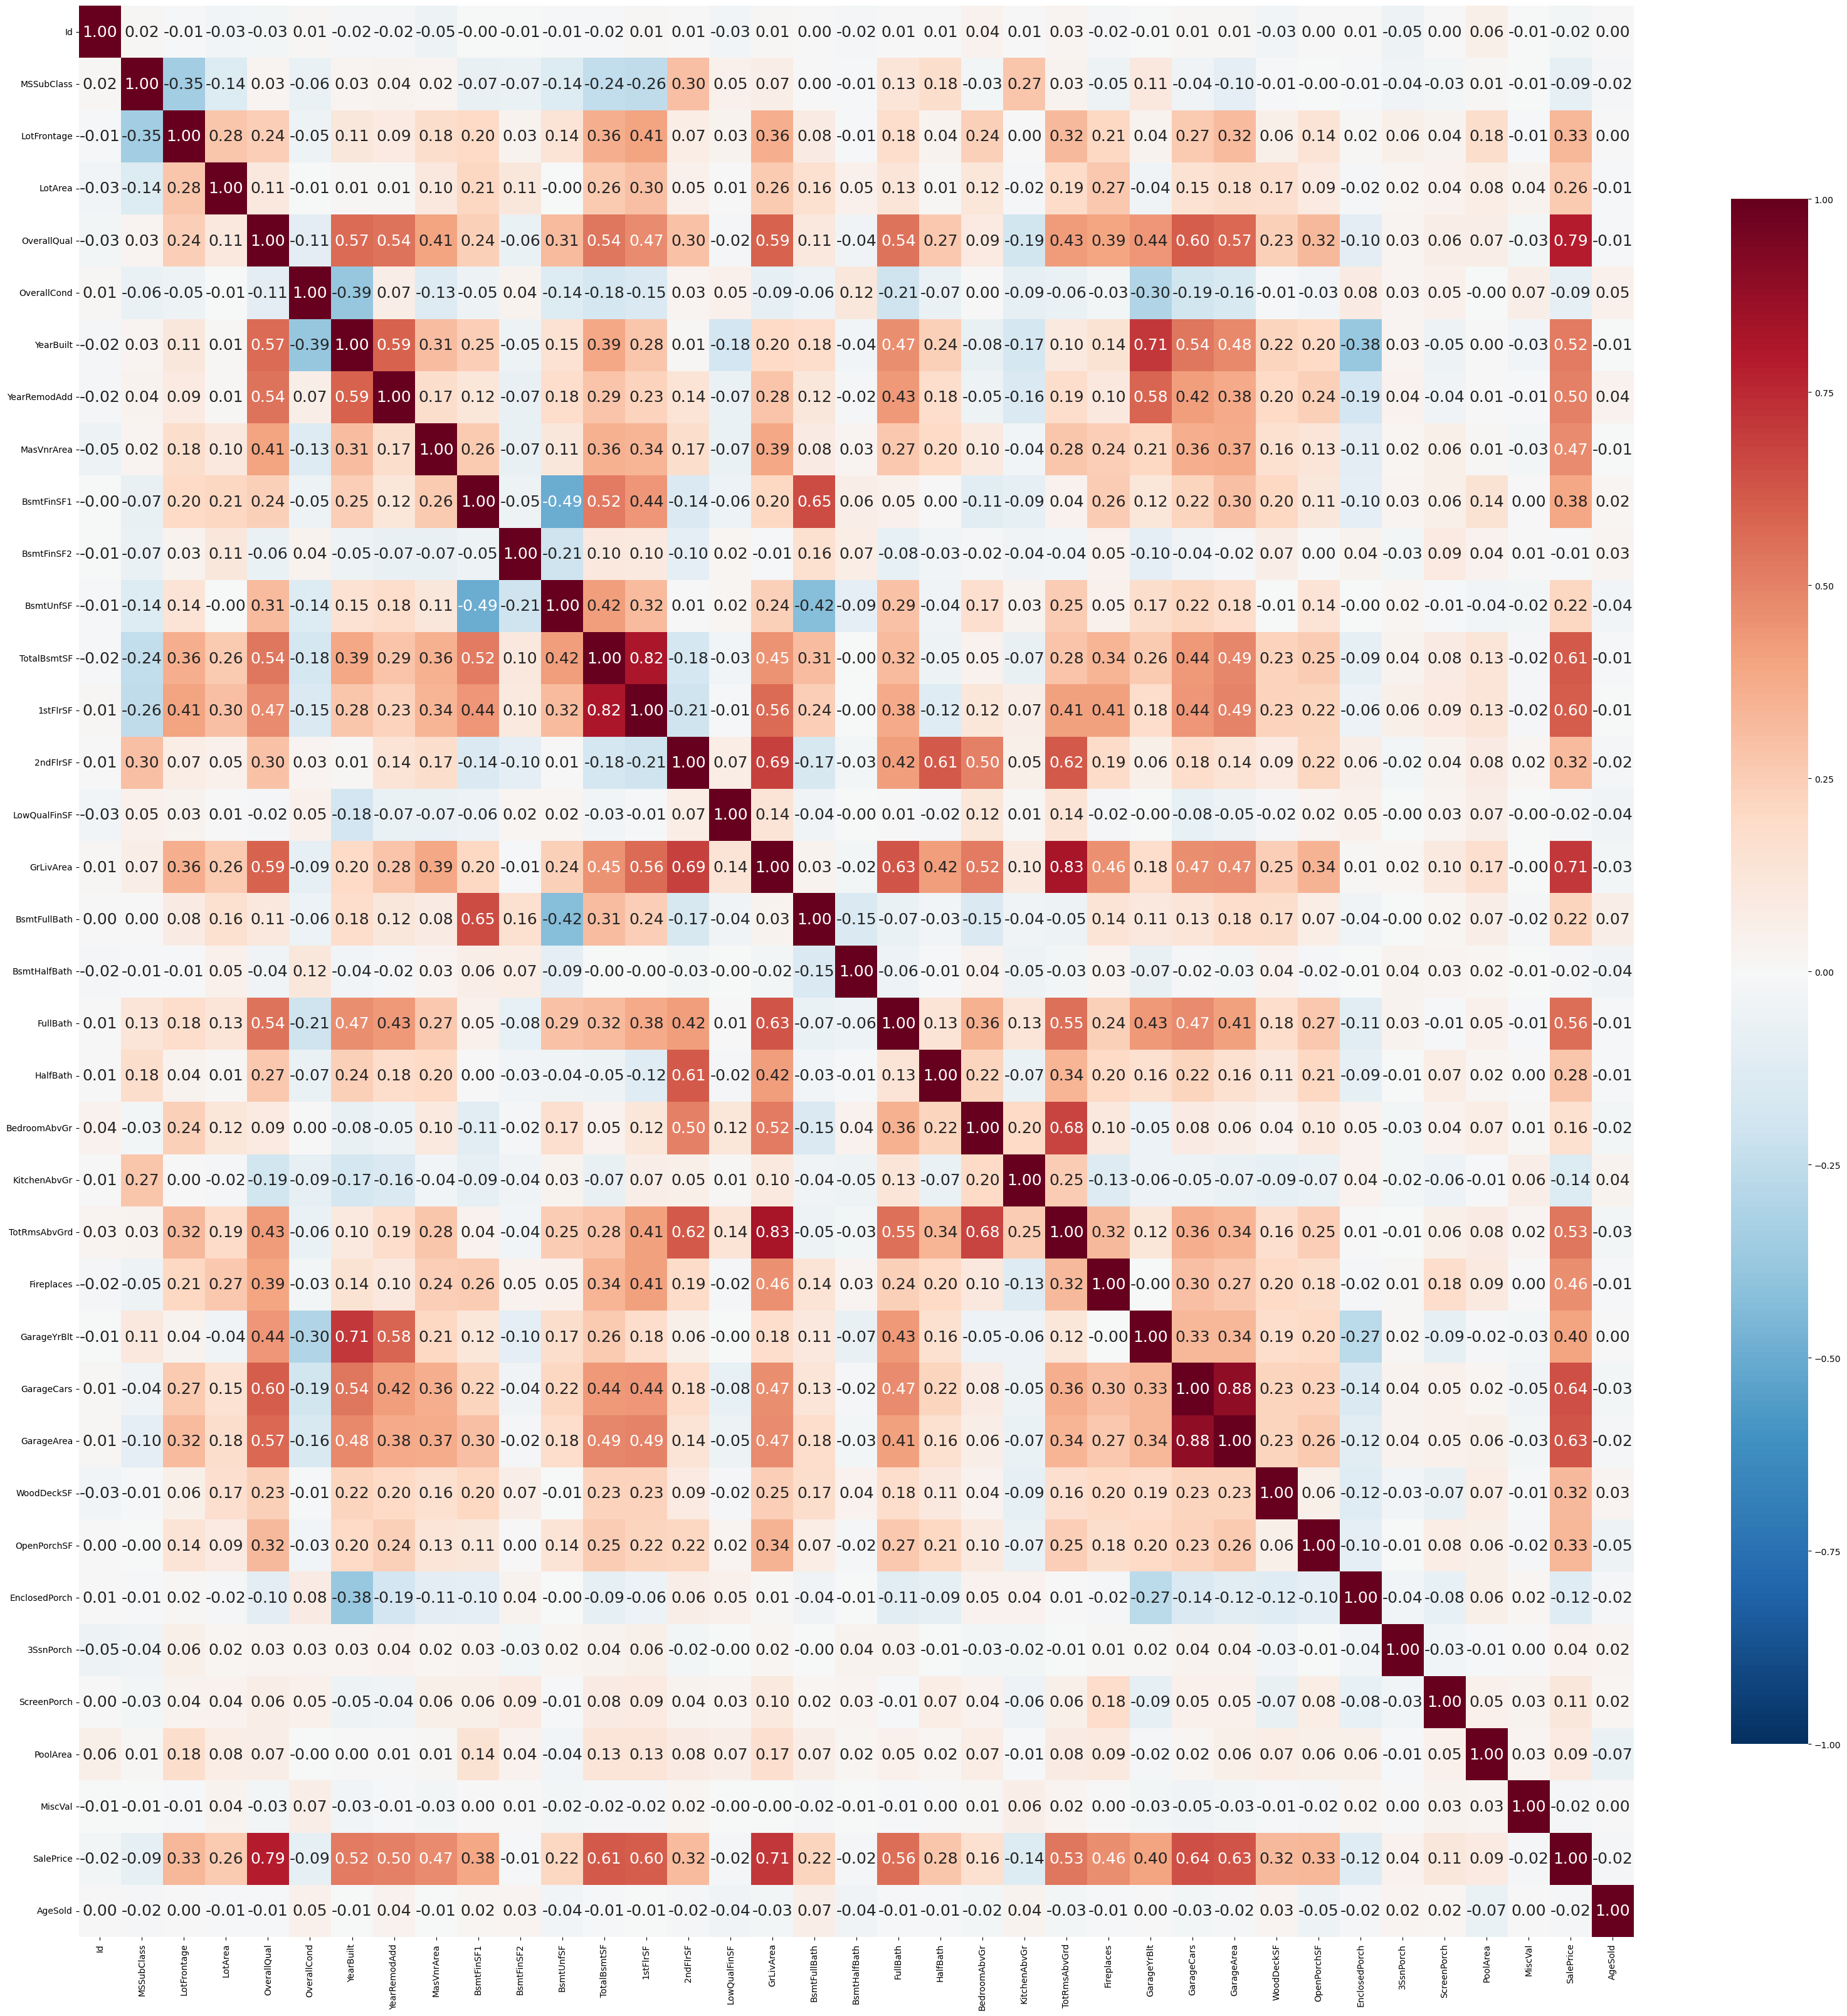

In [41]:
#Check the correlation of numerical variables

import seaborn as sns
plt.figure(figsize=(40,40))
plt.title = "Correlation Heatmap"
corrs = data3.corr(method = "pearson")

sns.heatmap(corrs, annot=True, fmt='.2f', annot_kws={'size':18},
                     cmap='RdBu_r', center=0, vmin=-1, vmax=1, cbar_kws={'shrink': 0.8}  )




In [21]:
# identify and  filter out the features that are highly correlated with the target variable (house price)



data5= data3.copy()
data5= pd.get_dummies(data5)
#print(data3.columns)

strongcorlst = []
for i in data5.columns:
    if data5["SalePrice"].corr(data5[i])>0.2:
        strongcorlst.append(i)


for x in strongcorlst:
    print("{:20} +/- {:.2f}".format(x ,data5["SalePrice"].corr(data5[x])))
    


LotFrontage          +/- 0.33
LotArea              +/- 0.26
OverallQual          +/- 0.79
YearBuilt            +/- 0.52
YearRemodAdd         +/- 0.50
MasVnrArea           +/- 0.47
BsmtFinSF1           +/- 0.38
BsmtUnfSF            +/- 0.22
TotalBsmtSF          +/- 0.61
1stFlrSF             +/- 0.60
2ndFlrSF             +/- 0.32
GrLivArea            +/- 0.71
BsmtFullBath         +/- 0.22
FullBath             +/- 0.56
HalfBath             +/- 0.28
TotRmsAbvGrd         +/- 0.53
Fireplaces           +/- 0.46
GarageYrBlt          +/- 0.40
GarageCars           +/- 0.64
GarageArea           +/- 0.63
WoodDeckSF           +/- 0.32
OpenPorchSF          +/- 0.33
SalePrice            +/- 1.00
MSZoning_RL          +/- 0.23
LotShape_IR1         +/- 0.22
Neighborhood_NoRidge +/- 0.33
Neighborhood_NridgHt +/- 0.40
Neighborhood_StoneBr +/- 0.22
HouseStyle_2Story    +/- 0.24
RoofStyle_Hip        +/- 0.24
Exterior1st_VinylSd  +/- 0.30
Exterior2nd_VinylSd  +/- 0.30
MasVnrType_Stone     +/- 0.33
ExterQual_

In [22]:


#remove the features that are lowly correlated with the target variable (house price)
data6= data3.copy()


data6 = data6.filter(items=strongcorlst)

data6.head()
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   2900 non-null   float64
 1   LotArea       2900 non-null   int64  
 2   OverallQual   2900 non-null   int64  
 3   YearBuilt     2900 non-null   int64  
 4   YearRemodAdd  2900 non-null   int64  
 5   MasVnrArea    2900 non-null   float64
 6   BsmtFinSF1    2900 non-null   int64  
 7   BsmtUnfSF     2900 non-null   int64  
 8   TotalBsmtSF   2900 non-null   int64  
 9   1stFlrSF      2900 non-null   int64  
 10  2ndFlrSF      2900 non-null   int64  
 11  GrLivArea     2900 non-null   int64  
 12  BsmtFullBath  2900 non-null   int64  
 13  FullBath      2900 non-null   int64  
 14  HalfBath      2900 non-null   int64  
 15  TotRmsAbvGrd  2900 non-null   int64  
 16  Fireplaces    2900 non-null   int64  
 17  GarageYrBlt   2900 non-null   float64
 18  GarageCars    2900 non-null 

<Axes: >

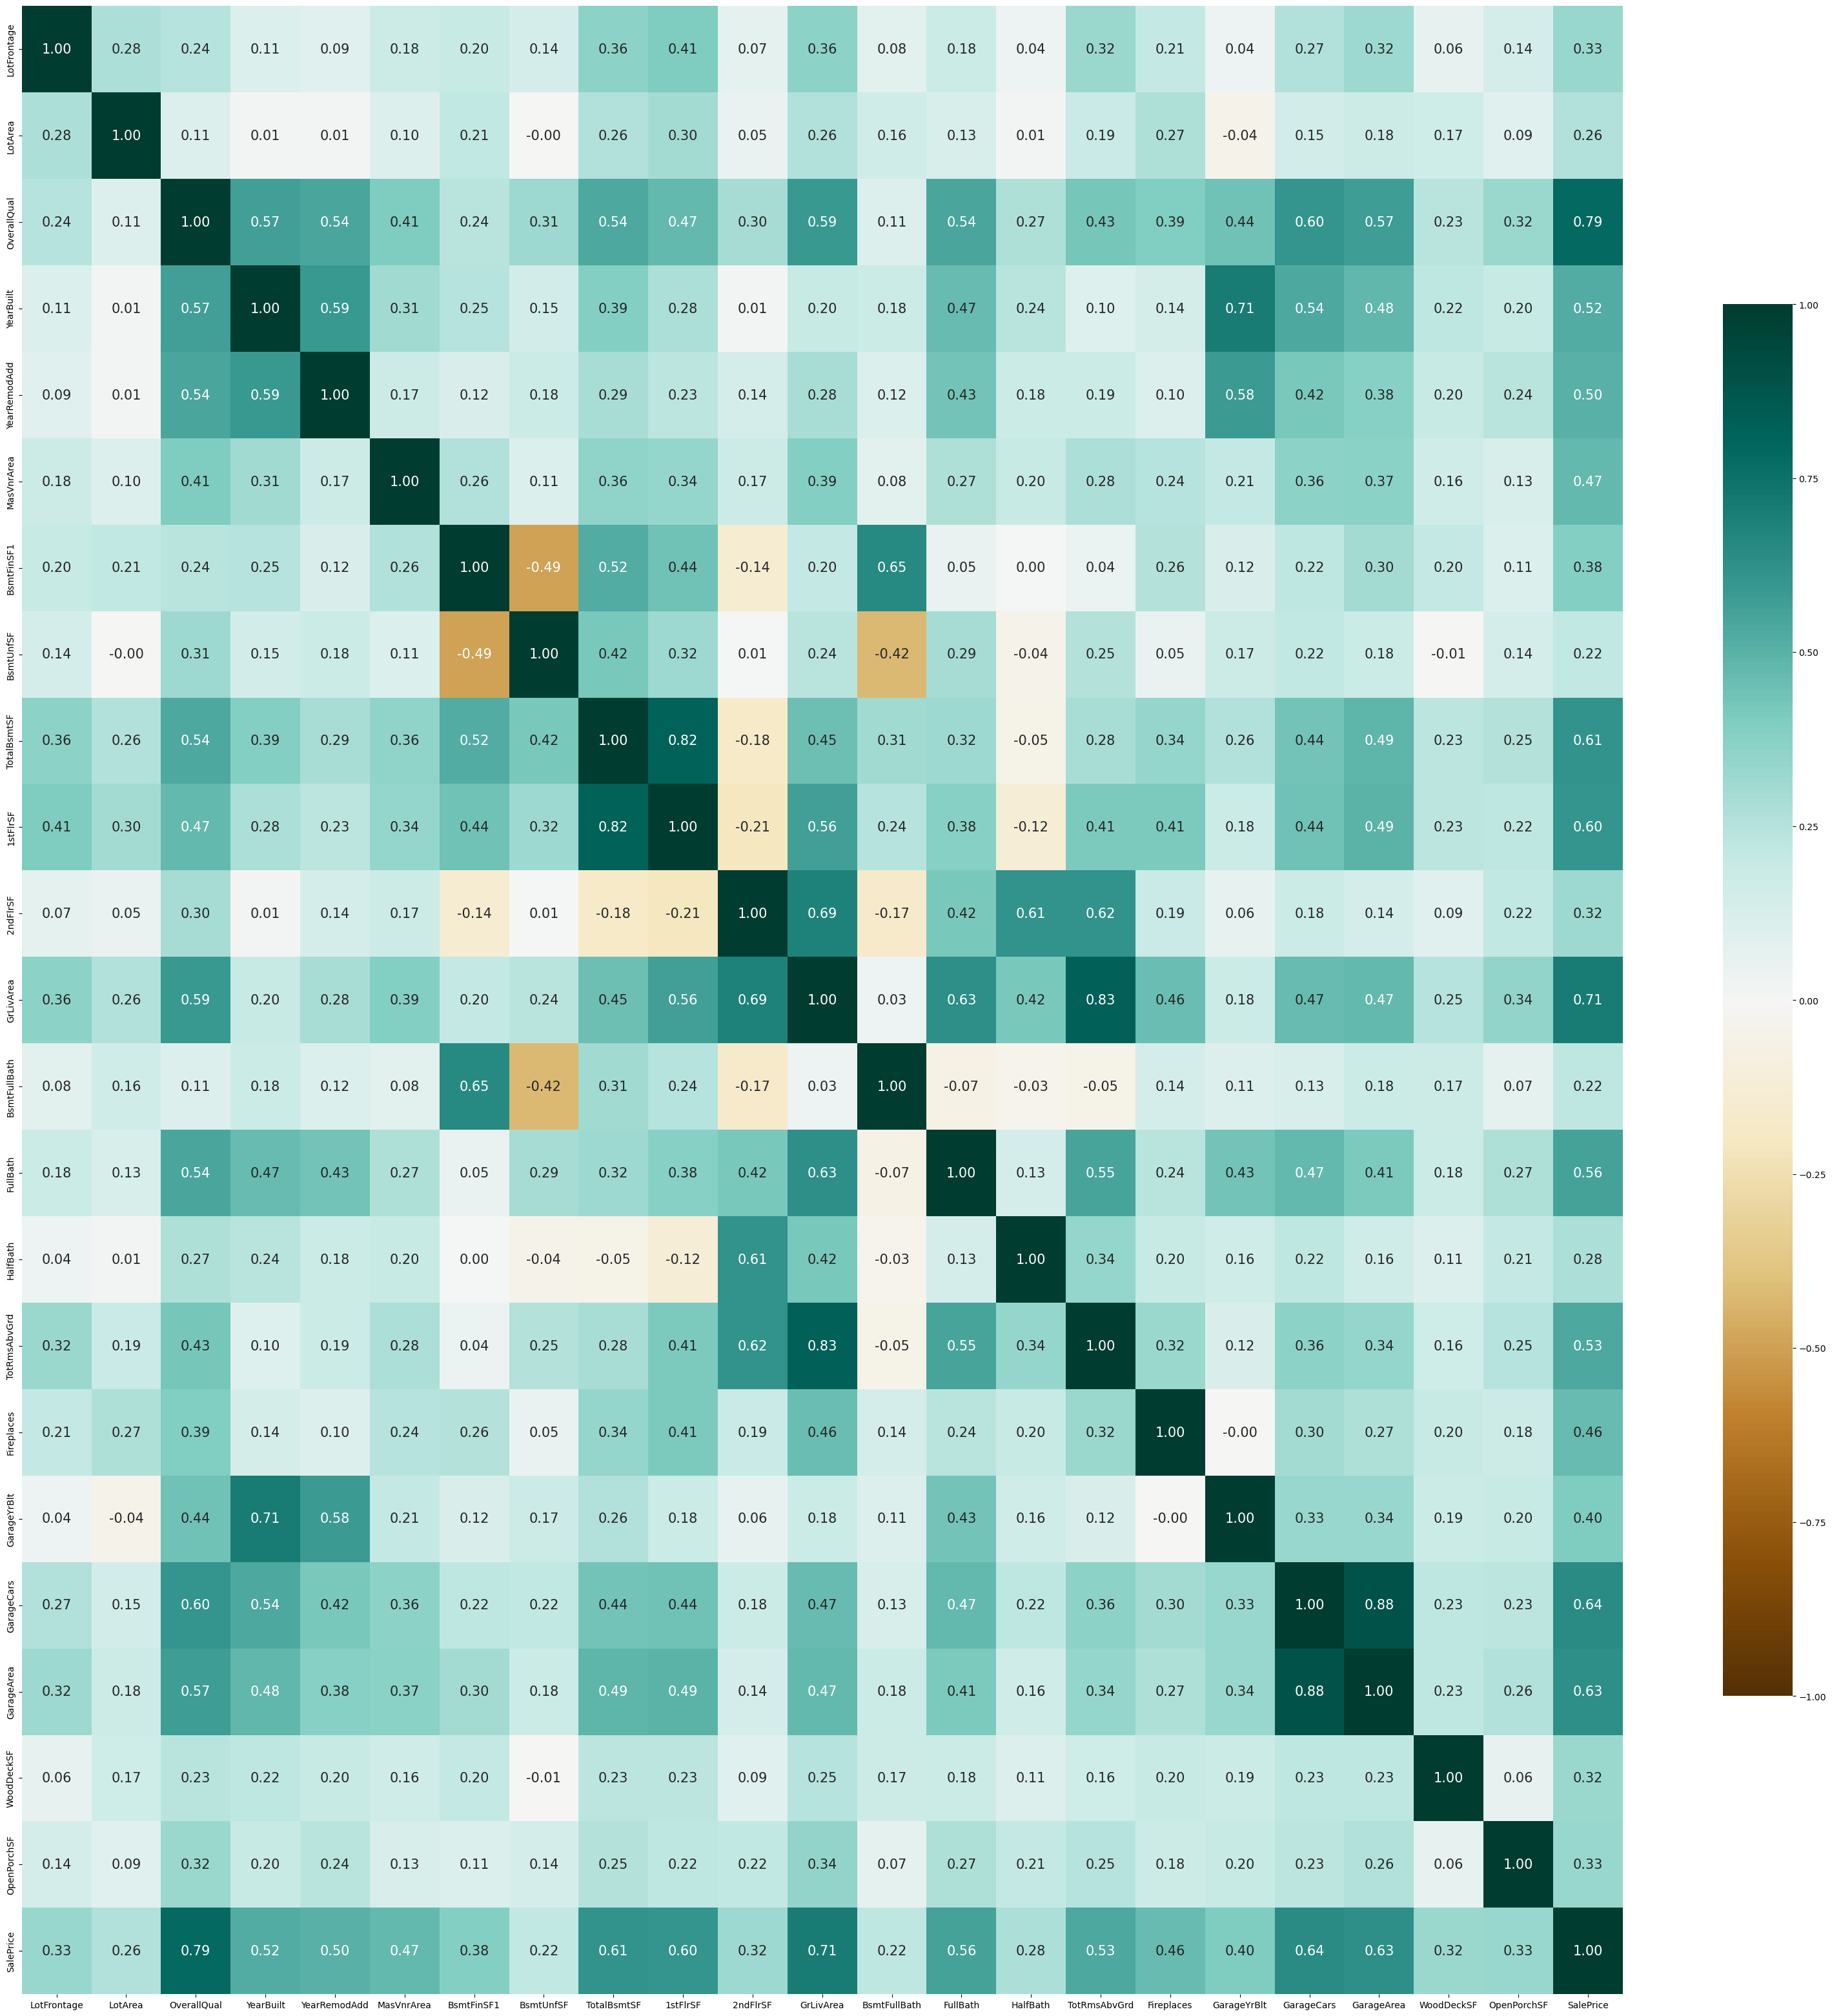

In [23]:
#check the correlation again

plt.figure(figsize=(40,40))
plt.title = "Correlation Heatmap"
corrs2 = data6.corr(method = "pearson")

sns.heatmap(corrs2, annot=True, fmt='.2f', annot_kws={'size':15},cmap = "BrBG",
                      center=0, vmin=-1, vmax=1, cbar_kws={'shrink': 0.7}  )


YearBuilt is highly correlated with GarageYrBlt (0.71). I'll only include YearBuilt in model.

BsmtFullBath is highly correlated with BsmtFinSF1 (0.65). I'll only include BsmtFinSF1  in model, as this has the higher correlation with SalePrice. 

Though ,1stFlrSF is highly correlated with TotalBsmtSF (0.82). I'll include both  in model, because they both are highly correlated with SalePrice. 

GrLiveArea, HalfBath, ToRmsAbvGrd is highly correlated with 2ndFlrSF . I'll only remove 2ndFlrSF  from the model

In [24]:
data7= data6 .copy()

removelst = ["GarageYrBlt","BsmtFinSF1","2ndFlrSF"]
for j in removelst:
    data7= data7.drop(j, axis = 1)
    

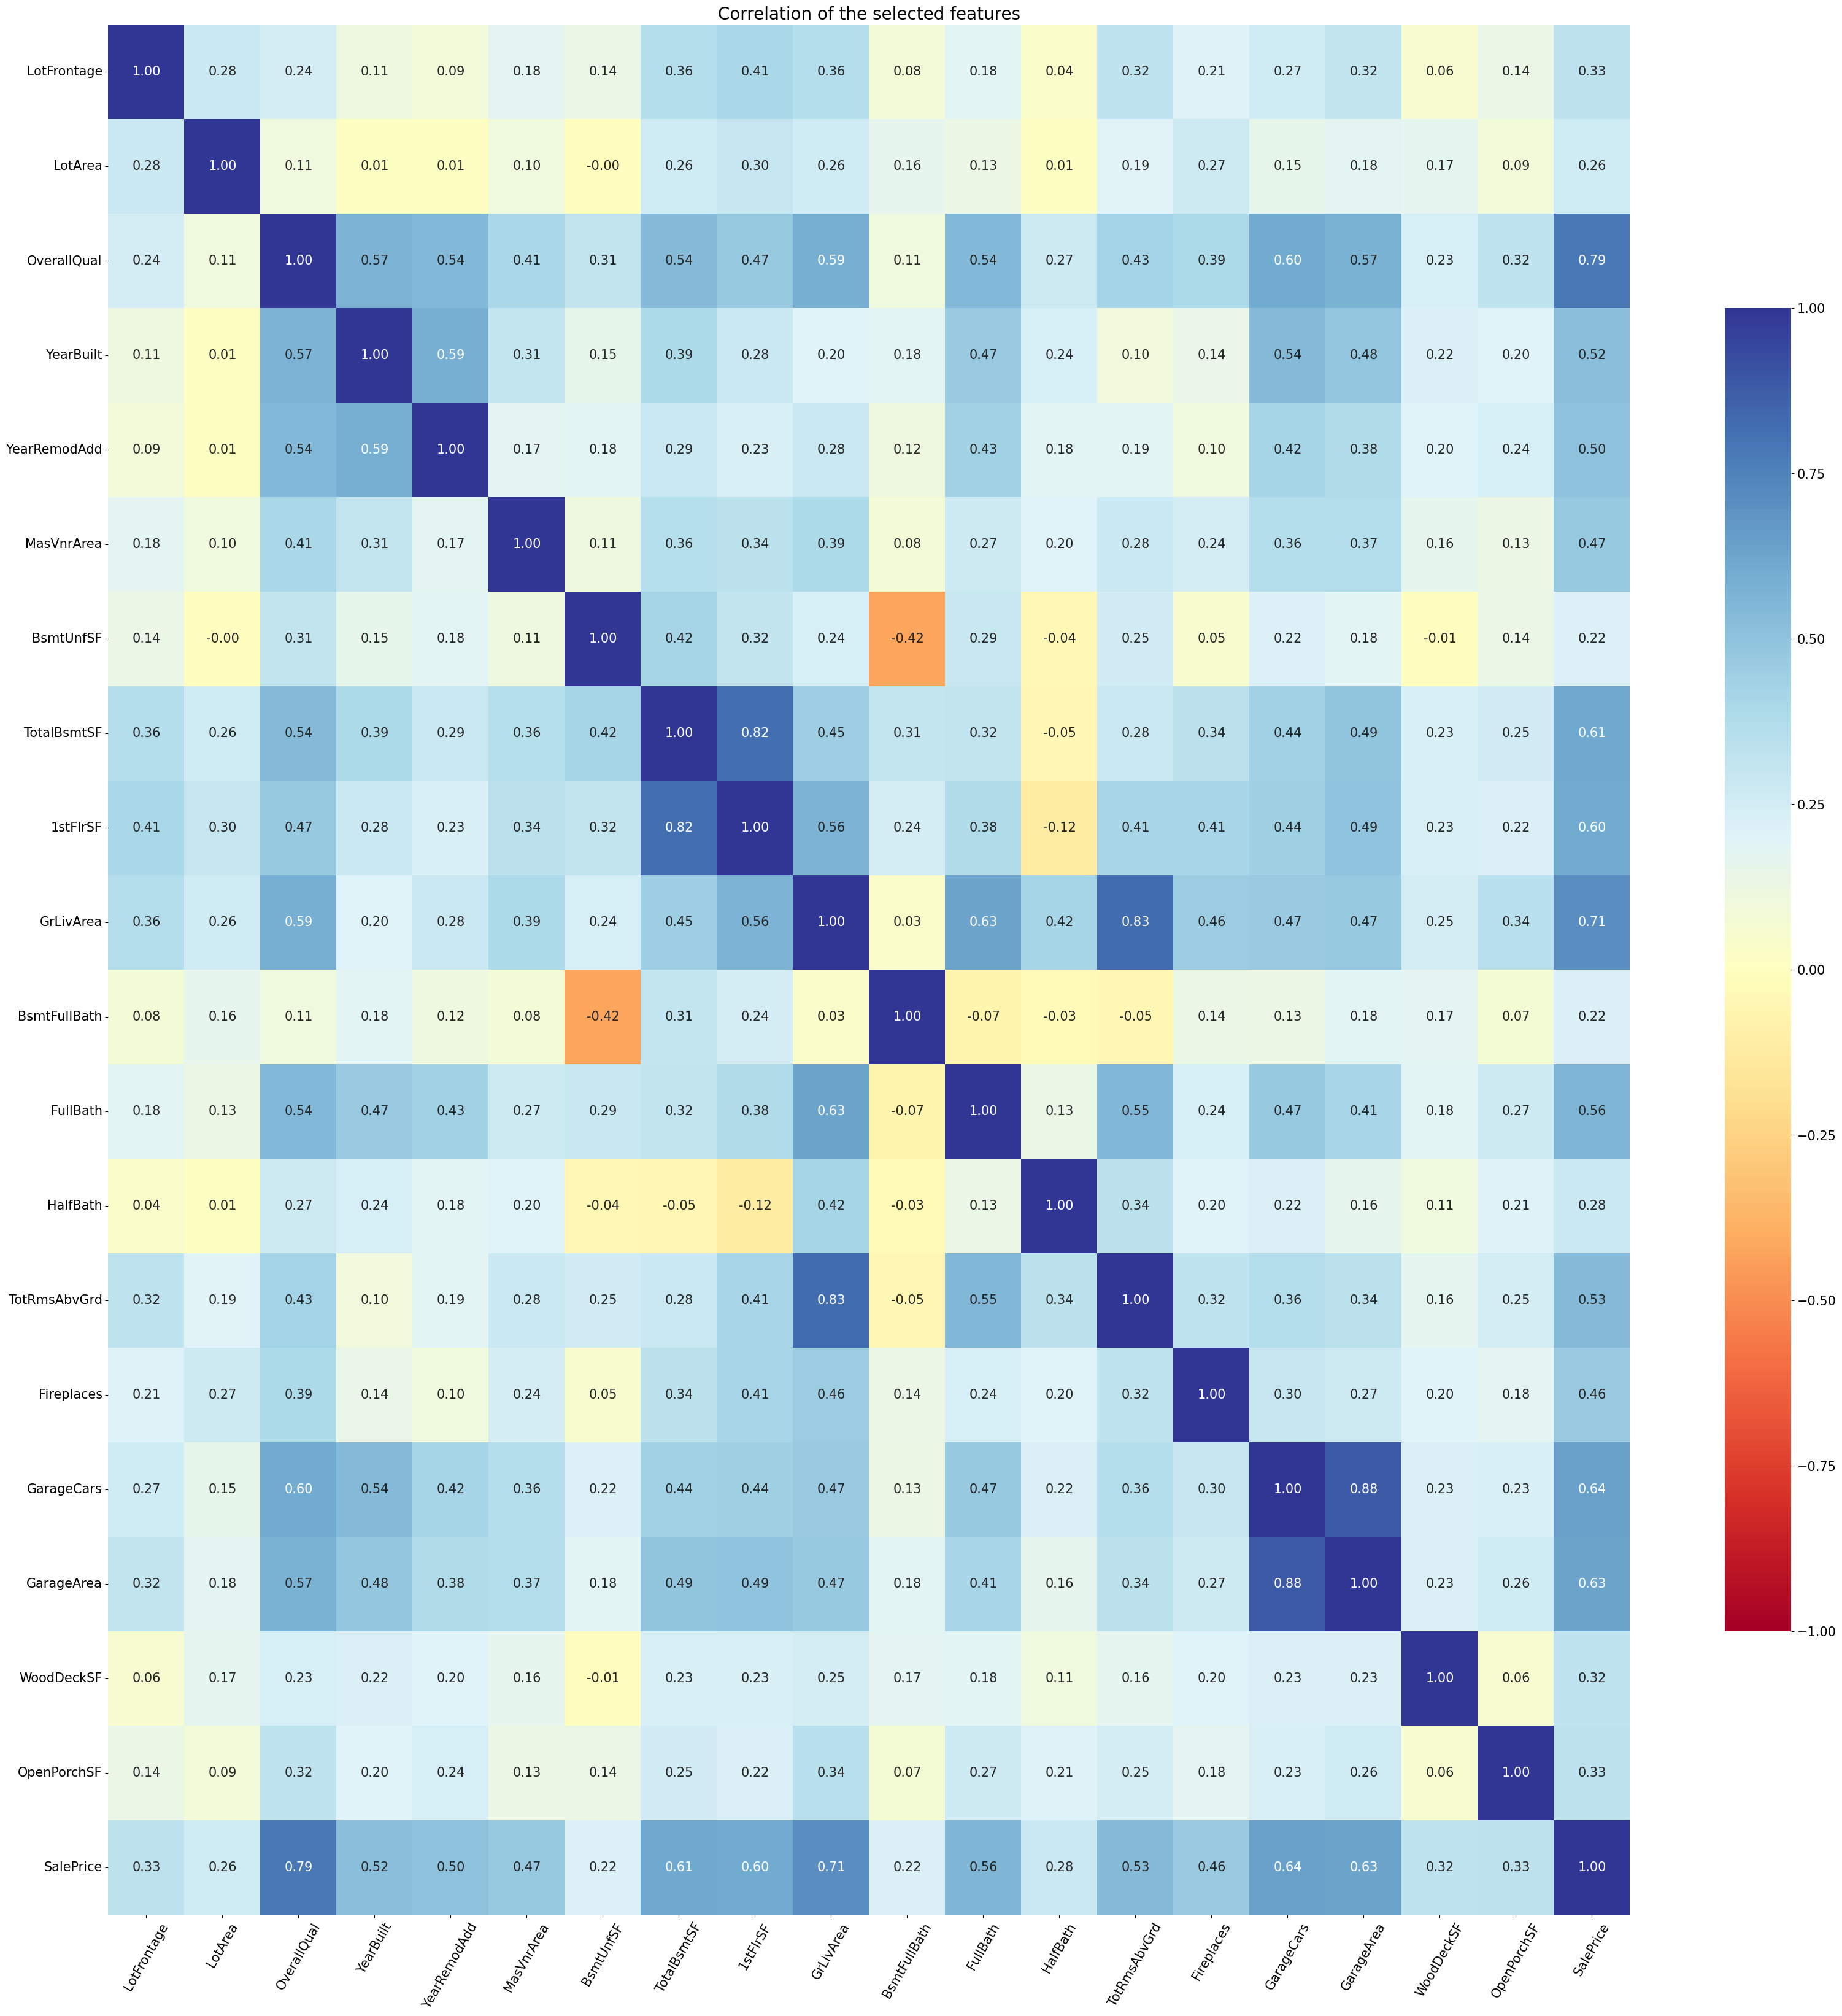

In [25]:
#check the correlation again

plt.figure(figsize=(40,40))
plt.title = "Correlation Heatmap"
corrs3 = data7.corr(method = "pearson")

ax=sns.heatmap(corrs3, annot=True, fmt='.2f', annot_kws={'size':15},
                     cmap='RdYlBu', center=0, vmin=-1, vmax=1, cbar_kws={'shrink': 0.7}  )


ax.set_title("Correlation of the selected features", fontsize=20)
    

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=15, rotation=60)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=15, rotation=0)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15) 
plt.show() 

In [26]:
data7.dtypes

LotFrontage     float64
LotArea           int64
OverallQual       int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
BsmtUnfSF         int64
TotalBsmtSF       int64
1stFlrSF          int64
GrLivArea         int64
BsmtFullBath      int64
FullBath          int64
HalfBath          int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageCars        int64
GarageArea        int64
WoodDeckSF        int64
OpenPorchSF       int64
SalePrice         int64
dtype: object

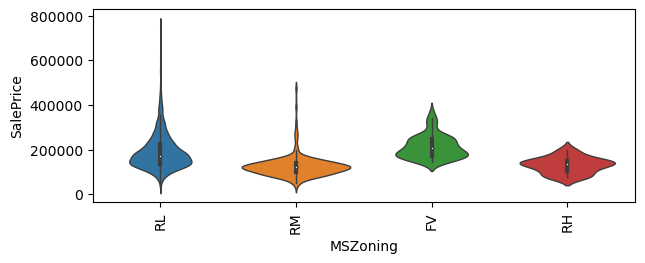

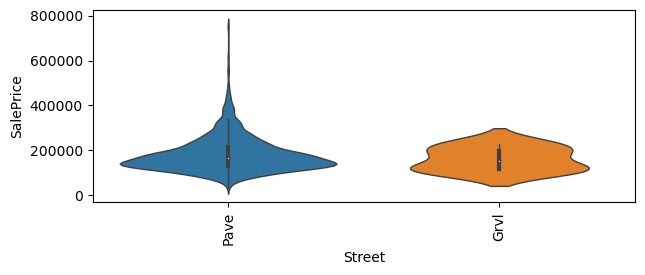

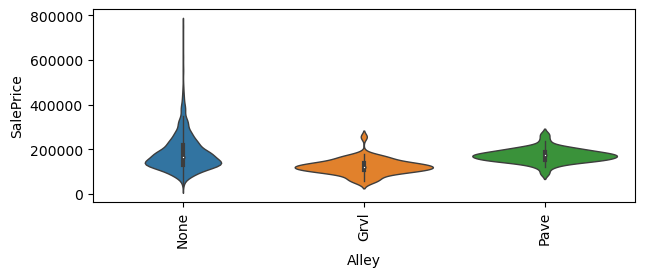

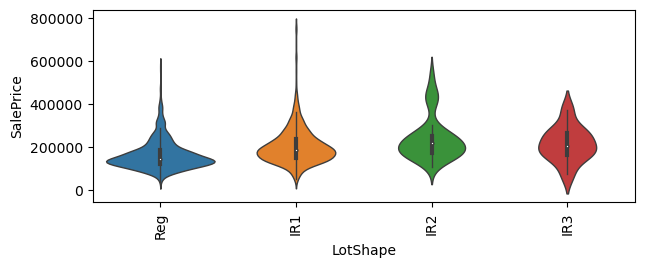

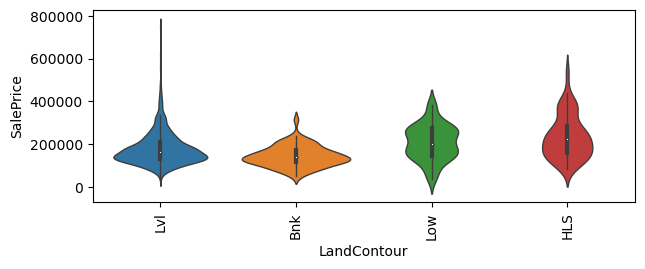

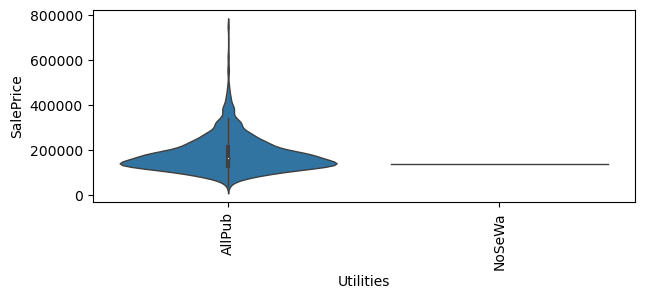

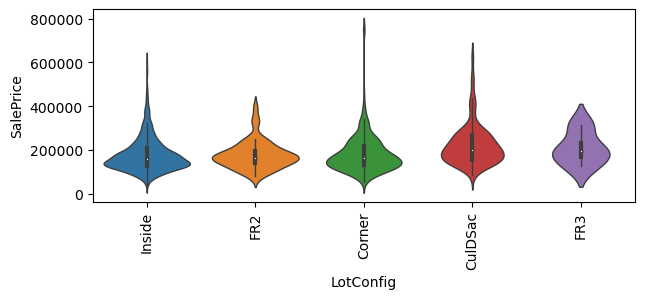

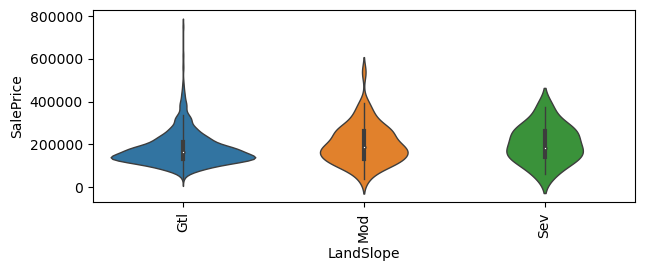

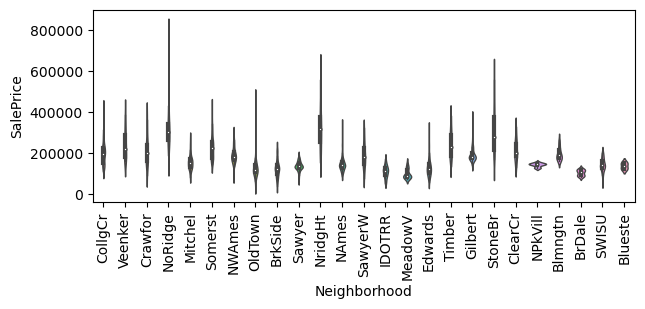

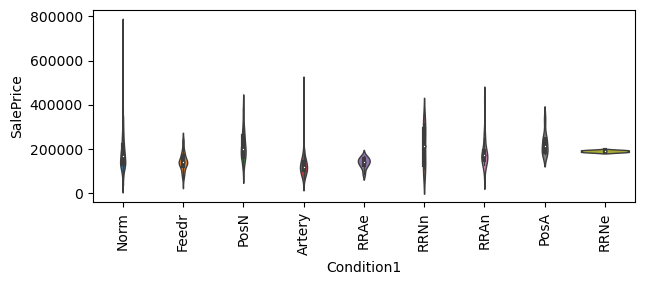

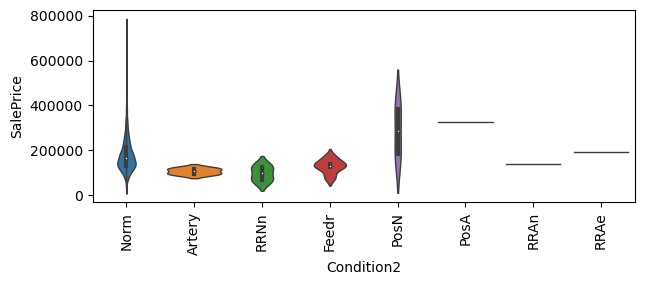

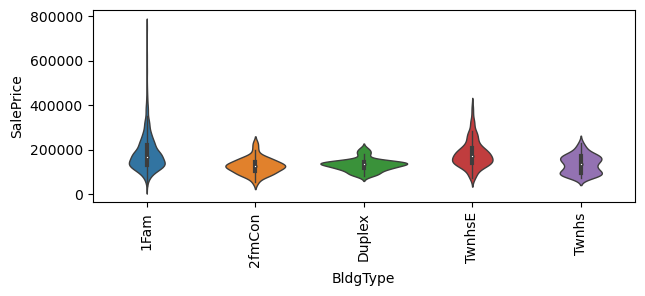

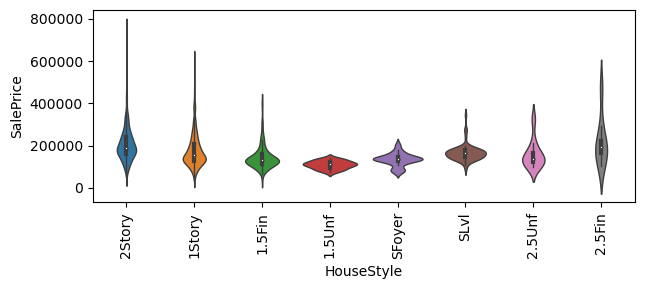

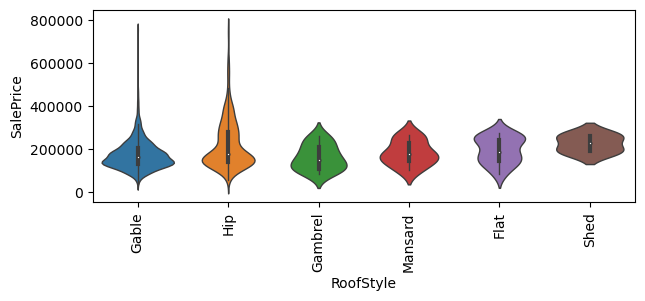

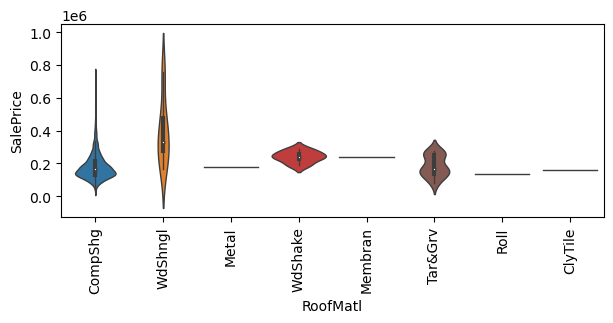

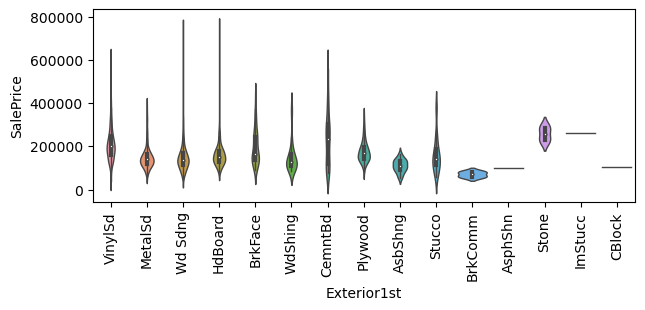

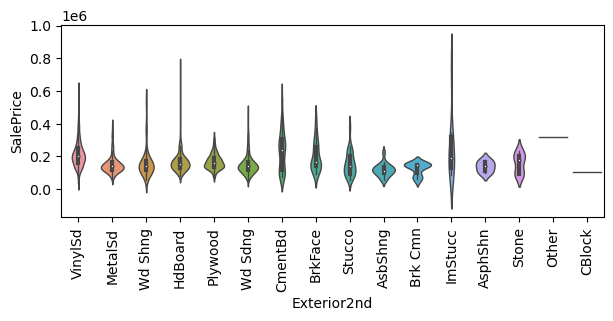

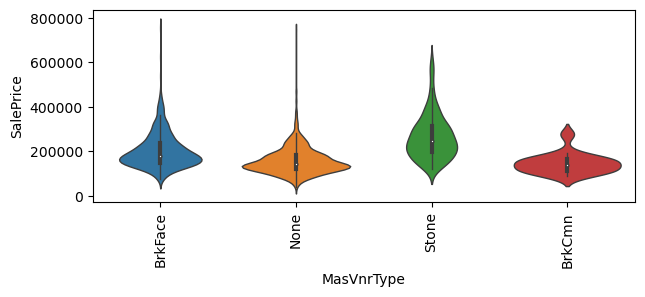

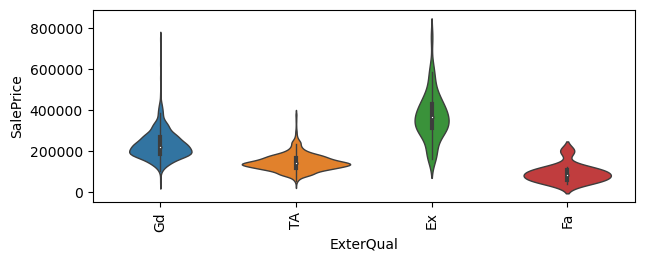

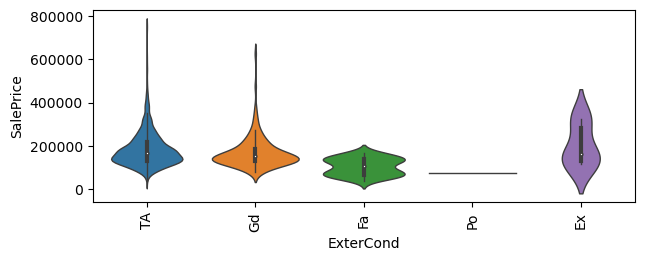

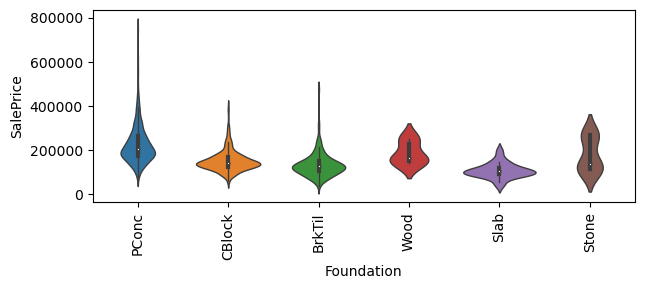

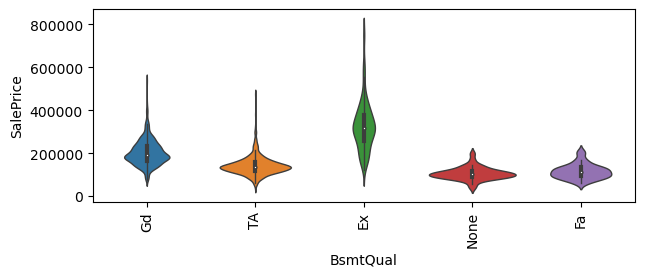

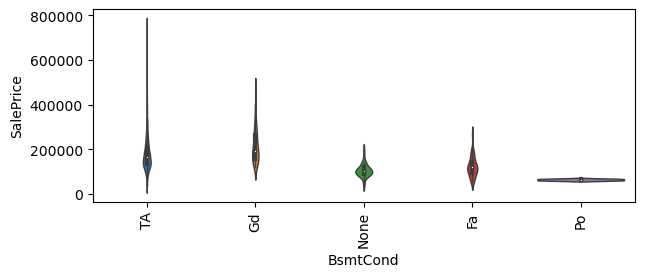

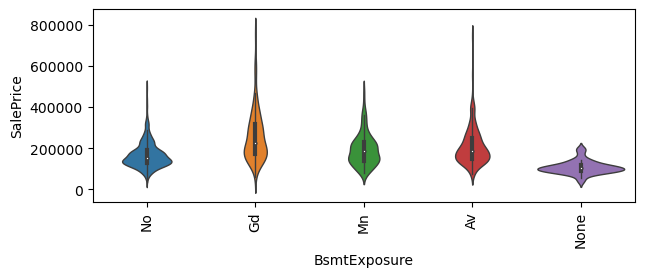

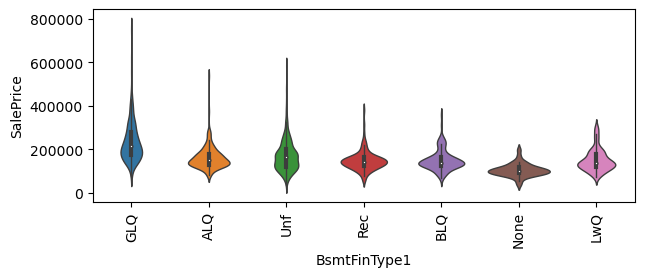

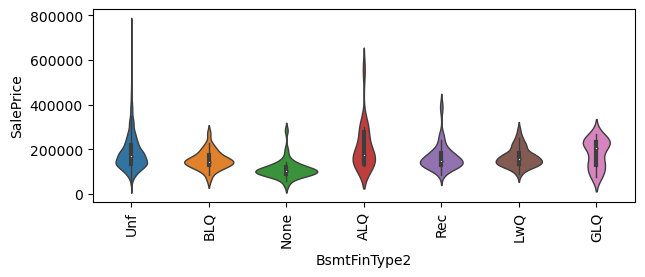

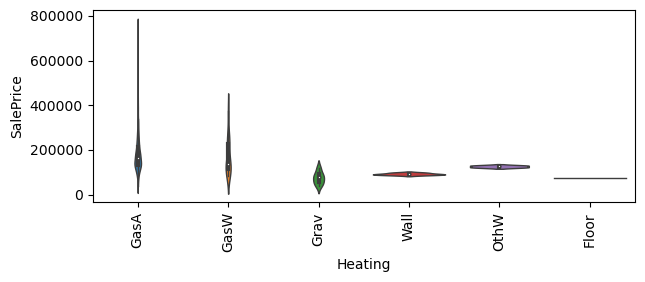

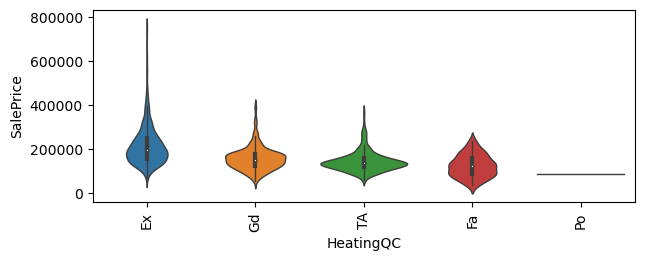

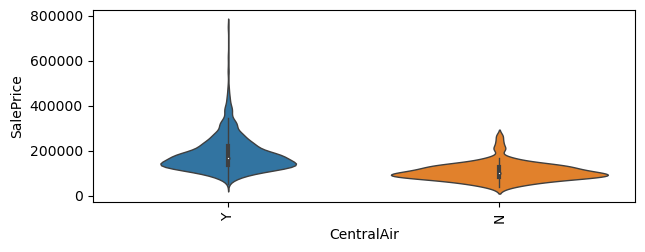

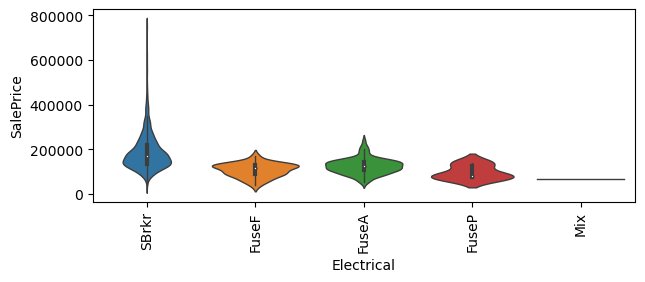

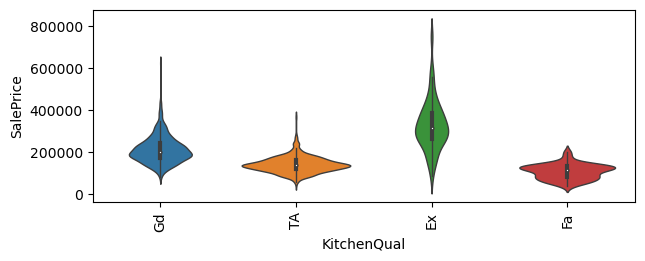

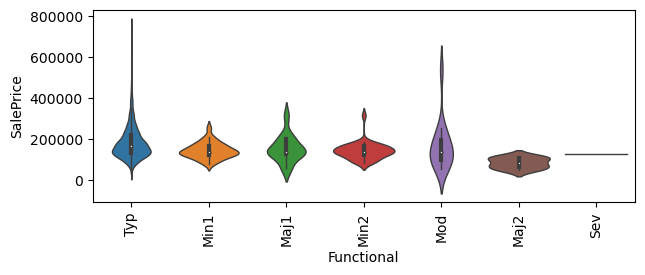

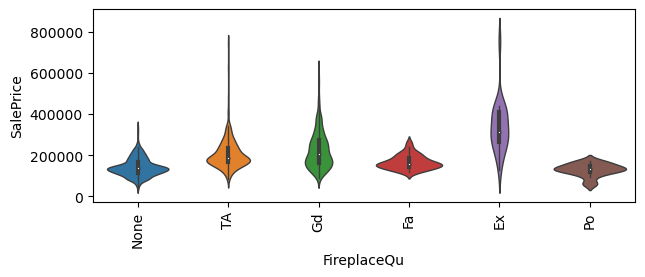

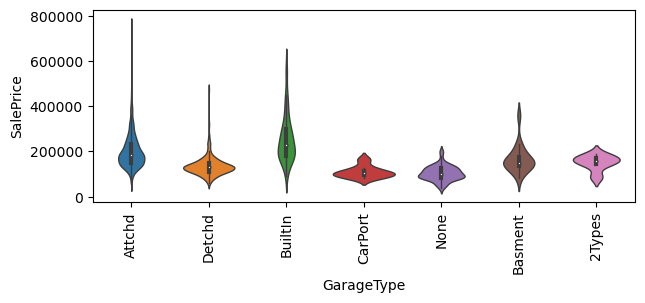

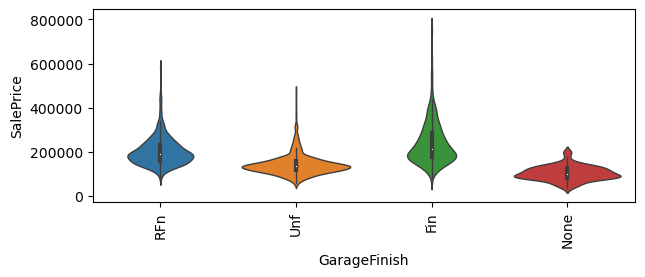

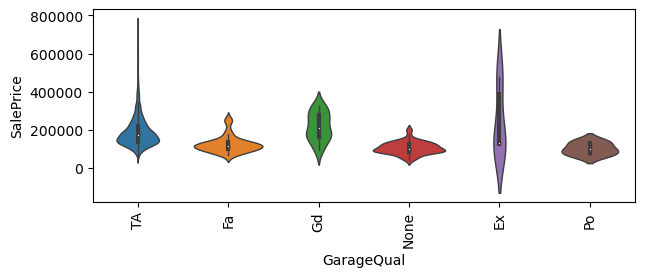

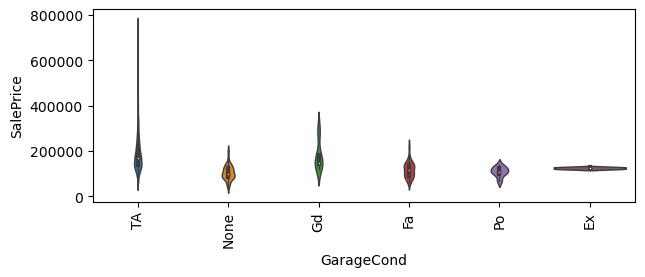

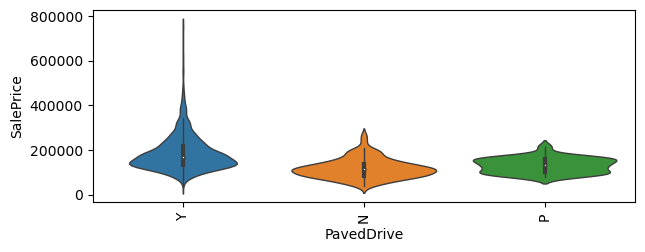

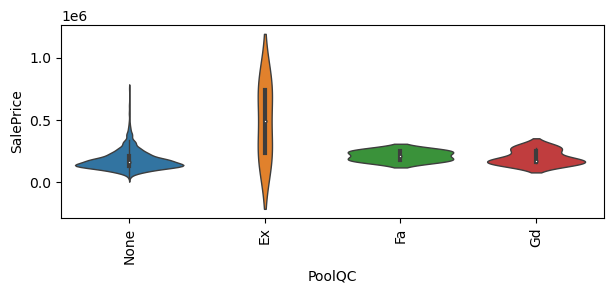

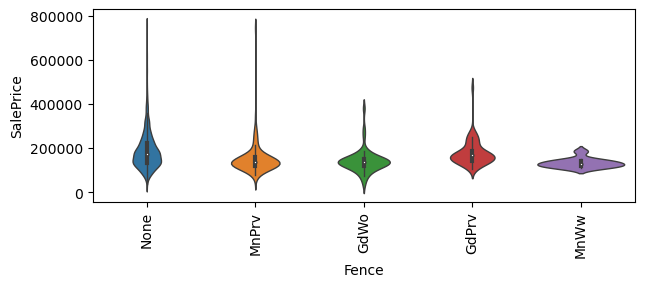

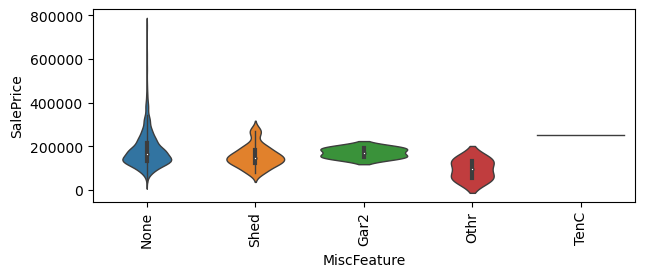

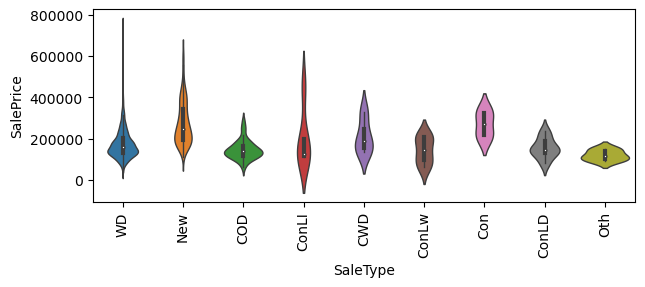

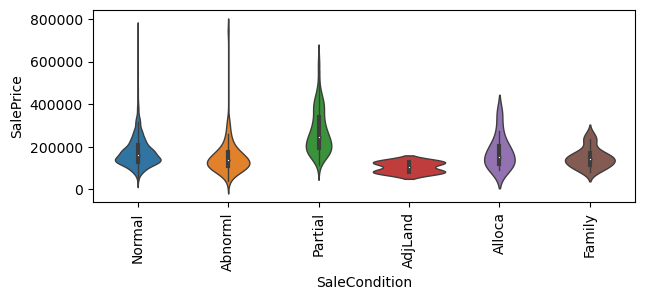

In [27]:
#check the correlation for categorical features
#we can apply Anova test on them to only include those significant features into our model.
#Here, I‘ll only include the feature whose p-value is lower than 0.05.

def plotcatgorical(dataset,catlst):
    for i in catlst:
        ax = plt.subplots(figsize=(7, 2.5))
        plt.xticks(rotation='vertical')
        ax=sns.violinplot(x=i, y="SalePrice", data=dataset, linewidth=1)
        plt.show()
plotcatgorical(data3, object_lst)


In [28]:
filter_catlst = ['SaleCondition','SaleType','MiscFeature',"PoolQC",'GarageQual','KitchenQual','Heating',
                'BsmtQual','BsmtCond','Utilities','Neighborhood','Condition1','Condition2',
                'HouseStyle','RoofMatl','ExterQual','ExterCond']
data_cat = data3[filter_catlst]
data_cat.head()

SaleCondition SaleType MiscFeature PoolQC GarageQual KitchenQual Heating  \
0        Normal       WD        None   None         TA          Gd    GasA   
1        Normal       WD        None   None         TA          TA    GasA   
2        Normal       WD        None   None         TA          Gd    GasA   
3       Abnorml       WD        None   None         TA          Gd    GasA   
4        Normal       WD        None   None         TA          Gd    GasA   

  BsmtQual BsmtCond Utilities Neighborhood Condition1 Condition2 HouseStyle  \
0       Gd       TA    AllPub      CollgCr       Norm       Norm     2Story   
1       Gd       TA    AllPub      Veenker      Feedr       Norm     1Story   
2       Gd       TA    AllPub      CollgCr       Norm       Norm     2Story   
3       TA       Gd    AllPub      Crawfor       Norm       Norm     2Story   
4       Gd       TA    AllPub      NoRidge       Norm       Norm     2Story   

  RoofMatl ExterQual ExterCond  
0  CompShg        Gd        TA  
1  CompShg        TA        TA  
2  CompShg        Gd        TA  
3  CompShg        TA        TA  
4  CompShg        Gd        TA

# Data Preprocessing

**Check the skewness **

In [29]:
#Check the skewness for numerical data

data8 = data7.copy()

for col in data8.columns:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(data8[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(data8[col].kurt()) )

LotFrontage     Skewness: 02.51     Kurtosis: 021.28
LotArea         Skewness: 12.17     Kurtosis: 201.73
OverallQual     Skewness: 00.24     Kurtosis: 000.09
YearBuilt       Skewness: -0.63     Kurtosis: -00.40
YearRemodAdd    Skewness: -0.51     Kurtosis: -01.26
MasVnrArea      Skewness: 02.67     Kurtosis: 010.05
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.23
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
GrLivArea       Skewness: 01.37     Kurtosis: 004.92
BsmtFullBath    Skewness: 00.59     Kurtosis: -00.85
FullBath        Skewness: 00.04     Kurtosis: -00.87
HalfBath        Skewness: 00.67     Kurtosis: -01.09
TotRmsAbvGrd    Skewness: 00.68     Kurtosis: 000.88
Fireplaces      Skewness: 00.64     Kurtosis: -00.22
GarageCars      Skewness: -0.34     Kurtosis: 000.23
GarageArea      Skewness: 00.16     Kurtosis: 000.87
WoodDeckSF      Skewness: 01.53     Kurtosis: 002.95
OpenPorchSF     Skewness: 02.23     Kurtosis: 

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageCars'}>],
       [<Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'OpenPorchSF'}>,
        <Axes: title={'center': 'SalePrice'}>]], dtype=object)

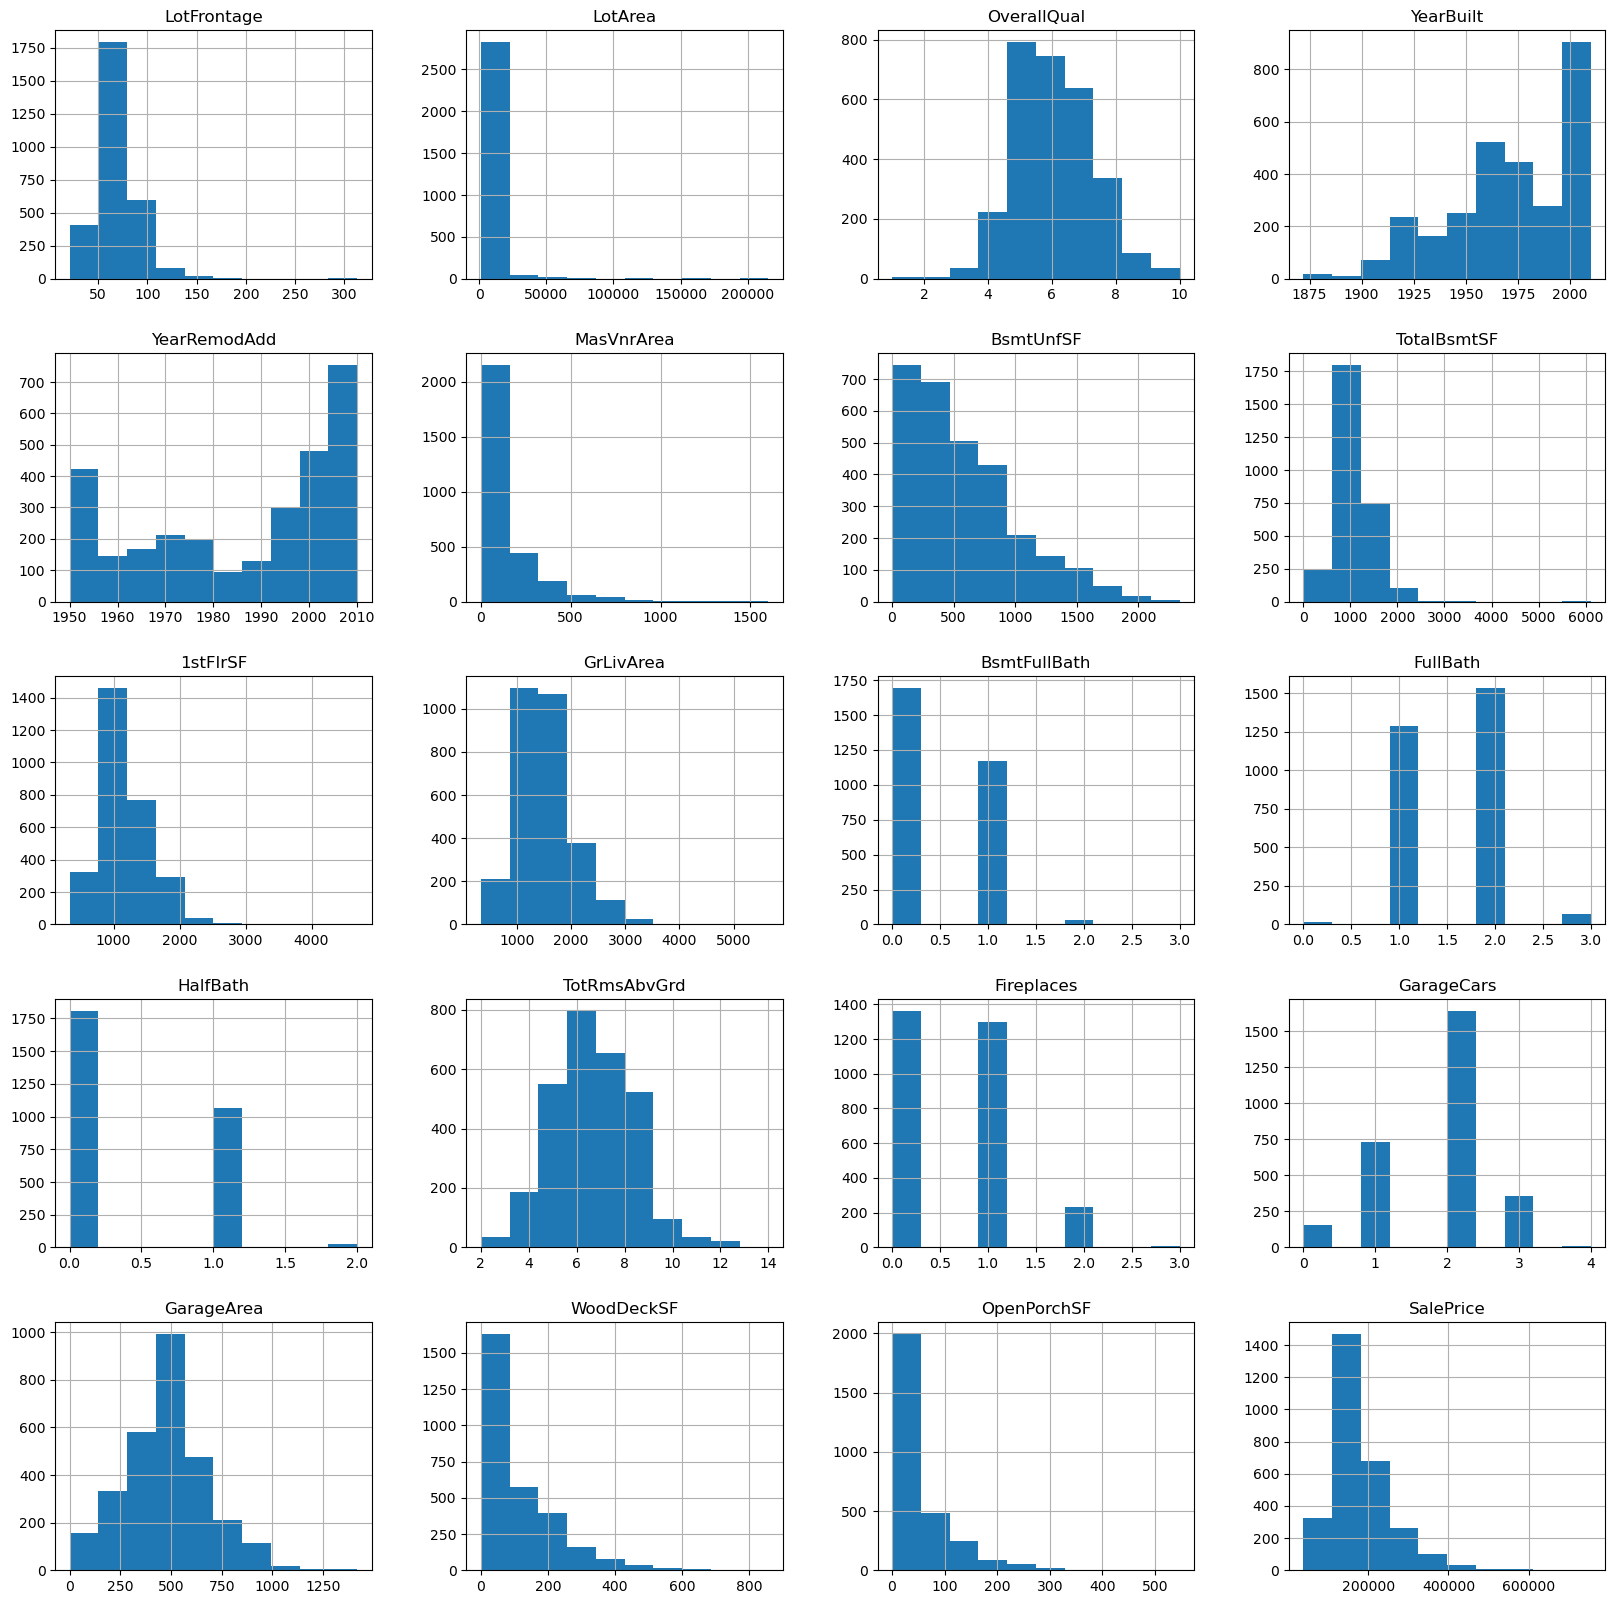

In [30]:
data8.hist(figsize=(20, 20))

In [31]:
# do the log-transformation on those skewness of features  higher than 1
skew_lst = data8.loc[:,data8.skew()>1].columns

data9 = data8.copy()
for cols in skew_lst:
    data9[cols] = np.log1p(data9[cols])
    
for col in data9.columns:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(data9[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(data9[col].kurt()) )

LotFrontage     Skewness: -0.64     Kurtosis: 003.13
LotArea         Skewness: -0.14     Kurtosis: 004.67
OverallQual     Skewness: 00.24     Kurtosis: 000.09
YearBuilt       Skewness: -0.63     Kurtosis: -00.40
YearRemodAdd    Skewness: -0.51     Kurtosis: -01.26
MasVnrArea      Skewness: 00.49     Kurtosis: -01.63
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: -5.14     Kurtosis: 027.53
1stFlrSF        Skewness: 00.08     Kurtosis: 000.15
GrLivArea       Skewness: 00.01     Kurtosis: 000.25
BsmtFullBath    Skewness: 00.59     Kurtosis: -00.85
FullBath        Skewness: 00.04     Kurtosis: -00.87
HalfBath        Skewness: 00.67     Kurtosis: -01.09
TotRmsAbvGrd    Skewness: 00.68     Kurtosis: 000.88
Fireplaces      Skewness: 00.64     Kurtosis: -00.22
GarageCars      Skewness: -0.34     Kurtosis: 000.23
GarageArea      Skewness: 00.16     Kurtosis: 000.87
WoodDeckSF      Skewness: 00.15     Kurtosis: -01.90
OpenPorchSF     Skewness: -0.03     Kurtosis: 

In [32]:
data9.head()

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0     4.189655  9.042040            7       2003          2003    5.283204   
1     4.394449  9.169623            6       1976          1976    0.000000   
2     4.234107  9.328212            7       2001          2002    5.093750   
3     4.110874  9.164401            7       1915          1970    0.000000   
4     4.442651  9.565284            8       2000          2000    5.860786   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0        150     6.753438  6.753438   7.444833             1         2   
1        284     7.141245  7.141245   7.141245             0         2   
2        434     6.825460  6.825460   7.488294             1         2   
3        540     6.629363  6.869014   7.448916             1         1   
4        490     7.044033  7.044033   7.695758             1         2   

   HalfBath  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0         1             8           0           2         548    0.000000   
1         0             6           1           2         460    5.700444   
2         1             6           1           2         608    0.000000   
3         0             7           1           3         642    0.000000   
4         1             9           1           3         836    5.262690   

   OpenPorchSF  SalePrice  
0     4.127134  12.247699  
1     0.000000  12.109016  
2     3.761200  12.317171  
3     3.583519  11.849405  
4     4.442651  12.429220

***Check the correlation between independent variable :SalePrice and numerical dependent variables ***

In [33]:
######Combine the numerical feature and categorical feature that we'd like to include in our model

data10 = pd.concat([data9, data_cat], axis=1)
data10.head()

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0     4.189655  9.042040            7       2003          2003    5.283204   
1     4.394449  9.169623            6       1976          1976    0.000000   
2     4.234107  9.328212            7       2001          2002    5.093750   
3     4.110874  9.164401            7       1915          1970    0.000000   
4     4.442651  9.565284            8       2000          2000    5.860786   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0        150     6.753438  6.753438   7.444833             1         2   
1        284     7.141245  7.141245   7.141245             0         2   
2        434     6.825460  6.825460   7.488294             1         2   
3        540     6.629363  6.869014   7.448916             1         1   
4        490     7.044033  7.044033   7.695758             1         2   

   HalfBath  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0         1             8           0           2         548    0.000000   
1         0             6           1           2         460    5.700444   
2         1             6           1           2         608    0.000000   
3         0             7           1           3         642    0.000000   
4         1             9           1           3         836    5.262690   

   OpenPorchSF  SalePrice SaleCondition SaleType MiscFeature PoolQC  \
0     4.127134  12.247699        Normal       WD        None   None   
1     0.000000  12.109016        Normal       WD        None   None   
2     3.761200  12.317171        Normal       WD        None   None   
3     3.583519  11.849405       Abnorml       WD        None   None   
4     4.442651  12.429220        Normal       WD        None   None   

  GarageQual KitchenQual Heating BsmtQual BsmtCond Utilities Neighborhood  \
0         TA          Gd    GasA       Gd       TA    AllPub      CollgCr   
1         TA          TA    GasA       Gd       TA    AllPub      Veenker   
2         TA          Gd    GasA       Gd       TA    AllPub      CollgCr   
3         TA          Gd    GasA       TA       Gd    AllPub      Crawfor   
4         TA          Gd    GasA       Gd       TA    AllPub      NoRidge   

  Condition1 Condition2 HouseStyle RoofMatl ExterQual ExterCond  
0       Norm       Norm     2Story  CompShg        Gd        TA  
1      Feedr       Norm     1Story  CompShg        TA        TA  
2       Norm       Norm     2Story  CompShg        Gd        TA  
3       Norm       Norm     2Story  CompShg        TA        TA  
4       Norm       Norm     2Story  CompShg        Gd        TA

***Model1 : Random Forest ***

In [34]:
data11 = data10.copy()
data11 = pd.get_dummies(data11)
data11.info()
119+11+9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Columns: 139 entries, LotFrontage to ExterCond_TA
dtypes: float64(9), int64(11), uint8(119)
memory usage: 790.3 KB


139

**Split Data in to training dataset and testing dataset**

In [42]:
train_final = data11.loc[:train0.index.max(), :].copy()
test_final = data11.loc[train0.index.max() + 1:, :].reset_index(drop=True).copy()


**Define X and Y**

In [43]:
from sklearn.model_selection import train_test_split
X_train = train_final.drop('SalePrice', axis=1)
X_test = test_final.drop('SalePrice', axis=1)
y_train =pd.DataFrame(train_final['SalePrice']) 
y_test  =pd.DataFrame(test_final['SalePrice'])

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = 0)


**What is the model  𝑅2  on training data?**

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
estimator = RandomForestRegressor(bootstrap= True,
 ccp_alpha=0.0,
 criterion='squared_error',
 max_depth= 10,
 max_features= 'auto',
 max_leaf_nodes= 10,
 max_samples= 150,
 min_impurity_decrease= 0.0,
 min_samples_leaf=15,
 min_samples_split= 20,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 100,
 n_jobs= None,
 oob_score= False,
 random_state= 50,
 verbose= 0,
 warm_start= False)
estimator.fit(X_train, y_train)

/tmp/ipykernel_33/3753539440.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=10, max_features='auto', max_leaf_nodes=10,
                      max_samples=150, min_samples_leaf=15,
                      min_samples_split=20, random_state=50)

In [55]:
#To get the feature importances from the Random Forest model use the feature_importances_ attribute:
estimator.feature_importances_

array([2.46545441e-03, 1.04710234e-02, 4.74383288e-01, 8.10327102e-02,
       1.20367718e-02, 2.24530346e-03, 1.07659346e-03, 4.44090911e-02,
       1.81366247e-02, 2.21640279e-01, 1.42238242e-03, 7.81643238e-03,
       1.02161603e-03, 1.69078555e-03, 2.62375571e-03, 2.62546810e-02,
       5.33043106e-02, 2.30201260e-03, 4.42075415e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.30137895e-03, 0.00000000e+00, 0.00000000e+00, 2.13114705e-04,
       3.49834840e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

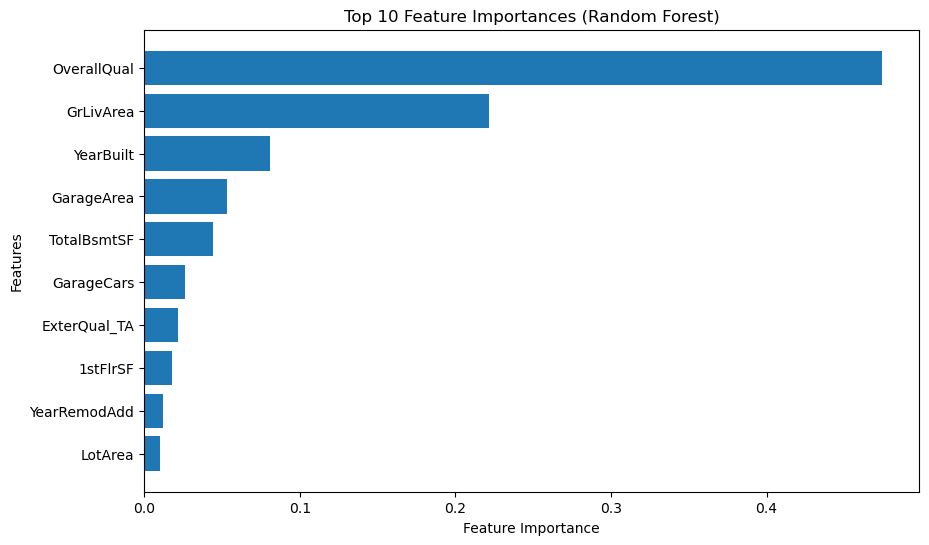

In [103]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

top_feature_indices = estimator.feature_importances_.argsort()[-10:]
top_feature_names = X_train.columns[top_feature_indices]

# Get the importances of the top 10 features
top_feature_importances = estimator.feature_importances_[top_feature_indices]

# Create a bar plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

In [66]:
top_feature_names

Index(['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF',
       'GarageCars', 'ExterQual_TA', '1stFlrSF', 'YearRemodAdd', 'LotArea'],
      dtype='object')

In [48]:
#What is the  𝑅2  on training data
y_predict = estimator.predict(X_test)
y_predict_val = estimator.predict(X_val)
rscore1=r2_score(y_test,y_predict)
print("the model  𝑅2 on training data is {:8.3f}".format(rscore1))
#What is the  𝑅2  on validation data?
rscore2=r2_score(y_val,y_predict_val)
print("the model  𝑅2  on validation data is {:5.3f}".format(rscore2))

the model  𝑅2 on training data is    0.782
the model  𝑅2  on validation data is 0.773


In [49]:
#the gap between 𝑅2 training and 𝑅2 validation score
gap = rscore2-rscore1
print(" gap between 𝑅2 training and 𝑅2 validation score {}".format(gap))

 gap between 𝑅2 training and 𝑅2 validation score -0.008977036900772228


In [50]:
#What is the Root Mean Squared Error (RMSE) on training data?
import math
rscore3=math.sqrt(mean_squared_error(y_test,y_predict))
print("the model  RMSE  on training data is {:.3f}".format(rscore3))
#What is the RMSE on validation data?
rscore4=math.sqrt(mean_squared_error(y_val,y_predict_val))
print("the model  RMSE on validation datais {:.3f}".format(rscore4))

the model  RMSE  on training data is 0.183
the model  RMSE on validation datais 0.198


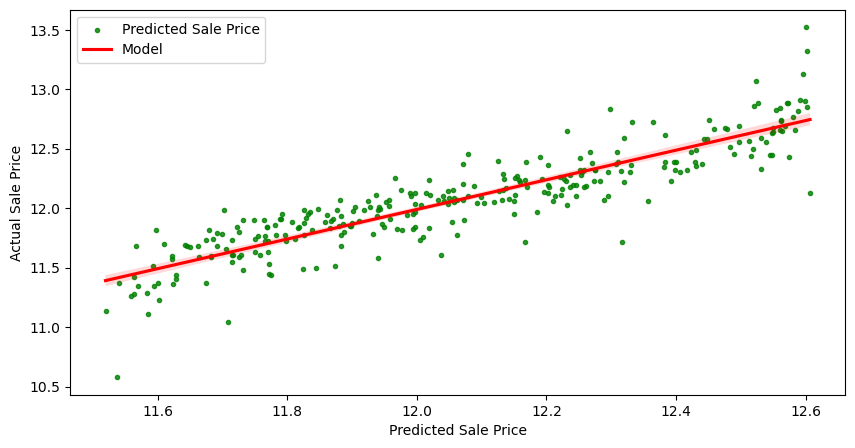

In [79]:
import seaborn as sns
title='Linear regression Predictions of Sale Price vs Actual Sale Price'
plt.figure(figsize=(10,5))
g=sns.regplot(data=X_val, x= y_predict_val, y=y_val, marker='.', color='green', line_kws={'color':'red'})
plt.xlabel('Predicted Sale Price', fontsize=10)
plt.ylabel('Actual Sale Price', fontsize=10)
plt.legend( labels=['Predicted Sale Price', 'Model'])
plt.show(g)

****

**Gradient Boosting Regressor**

In [98]:

from sklearn.ensemble import GradientBoostingRegressor
# Gradient Boosting Regressor
estimator2 = GradientBoostingRegressor(n_estimators=10000,
                                learning_rate=0.001,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  
estimator2.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.001, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=10000,
                          random_state=42)

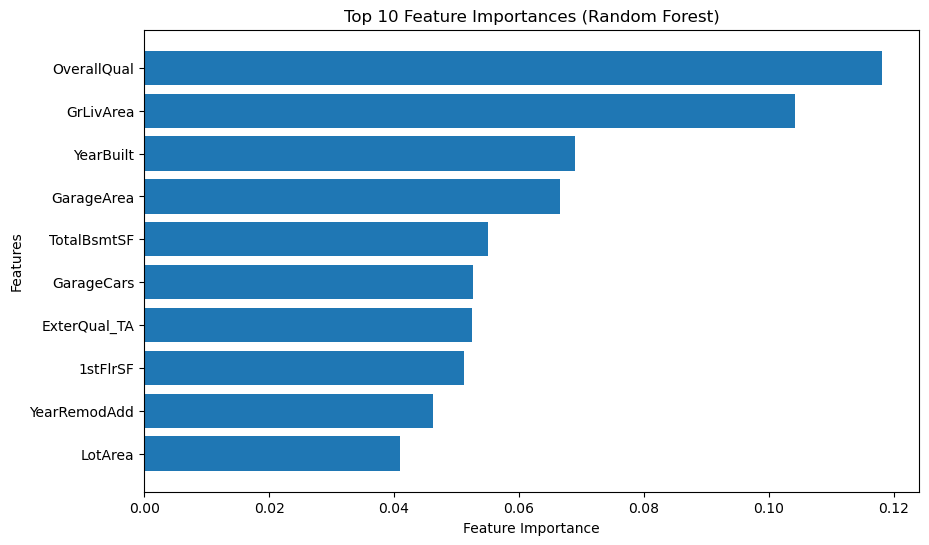

In [105]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

top_feature_indices2 = estimator2.feature_importances_.argsort()[-10:]
top_feature_names2 = X_train.columns[top_feature_indices]

# Get the importances of the top 10 features
top_feature_importances2 = estimator2.feature_importances_[top_feature_indices2]

# Create a bar plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names2, top_feature_importances2)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

In [106]:
#What is the  𝑅2  on training datadata?
y_predict_gbr = estimator2.predict(X_test)
y_predict_val_gbr = estimator2.predict(X_val)
rscore1_gbr=r2_score(y_test,y_predict_gbr)
print("the model  𝑅2  on training data is {}".format(rscore1_gbr))
#What is the  𝑅2  on validation data?
rscore2_gbr=r2_score(y_val,y_predict_val_gbr)
print("the model  𝑅2  on validation data is {}".format(rscore2_gbr))

the model  𝑅2  on training data is 0.9200409059410134
the model  𝑅2  on validation data is 0.8861527652569887


In [107]:
#the gap between 𝑅2 training and 𝑅2 validation score
gap = rscore1_gbr-rscore2_gbr
print(" gap between 𝑅2 training and 𝑅2 validation score {}".format(gap))



 gap between 𝑅2 training and 𝑅2 validation score 0.03388814068402468


In [108]:
#What is the Root Mean Squared Error (RMSE) on training data?
import math
rscore3_gbr=math.sqrt(mean_squared_error(y_test,y_predict_gbr))
print("the model  Root Mean Squared Error  on training data is {}".format(rscore3_gbr))

the model  Root Mean Squared Error  on training data is 0.11089723960429676


In [109]:
#What is the RMSE on validation data?
rscore4_gbr=math.sqrt(mean_squared_error(y_val,y_predict_val_gbr))
print("the model  RMSE on validation datais {}".format(rscore4_gbr))

the model  RMSE on validation datais 0.14018476370571023


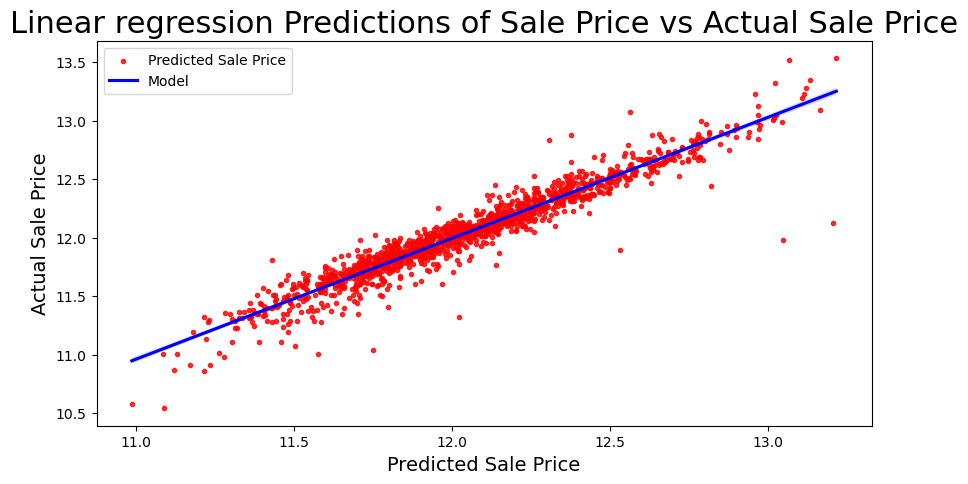

In [112]:
plt.figure(figsize=(10,5))
sns.regplot(data=X_val, x=y_predict_gbr, y=y_test, marker='.', color='red', line_kws={'color':'blue'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Linear regression Predictions of Sale Price vs Actual Sale Price', fontsize=22)
plt.legend( labels=['Predicted Sale Price', 'Model'])